<a href="https://colab.research.google.com/github/ICBI/AIMAHEAD_GU/blob/main/Courses/ML_Concepts/Module_01_Introduction_to_Classification/Module_01_Introduction_to_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 1: Introduction to Classification

The aim of this notebook is to provide an hands-on demo to machine learning in Python. We will be using `scikit-learn`, which is a popular Python package for machine learning. `Scikit-learn` is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities. 

Learn more about **scikit-learn** (**sklearn** for short) here: https://scikit-learn.org/stable/
Sklearn tutorials covering various aspects of machine learning can be found here: https://scikit-learn.org/stable/tutorial/index.html




The learning objective of this notebook are:
* Learning how to train a basic classification model
* Use the model to make predictions on new unseen data
* Generate a confusion matrix and a classification report 
* Learn how to calculate different metrics
* Plot ROC curves
* Try other classifiers and compare models

## Packages



We will start by loading some of the packages that will help us 
organize and visualize the data. Other packages will be loaded as necessary.

In [1]:
#Import packages
from collections import Counter
import pandas as pd
import numpy as np
import collections, numpy
import mlxtend
import matplotlib 
from matplotlib import pyplot 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
matplotlib.rcParams['figure.figsize'] = (10, 10)


from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc

## Dataset

We will be building and evaluating models to predict **diabetes** using using the diabetes dataset from the National Institute of Diabetes and Digestive and Kidney Diseases (**NIDDK**). 

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 

We will be using the **NIDDK diabetes dataset**, which contains 768 female patients of at least 21 years old.  Fields in this dataset are:




* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function
* **Age:** Age (years)
* **Outcome:** Class variable (0 or 1); class value 1 is interpreted as "tested positive for diabetes"


Let's explore the dataset. You must first obtain the data file "diabetes.csv" and upload it to a directory that is accessable by this colab notebook.  

In [ ]:
diabetes_file = "/content/drive/MyDrive/Work/HIDS_506_2022/lecture3_draft/diabetes.csv"

In [ ]:
diabetes_df = pd.read_csv(diabetes_file)

We can use the head() function to inspect the first few rows of the dataset, and the "shape" property confirms that we have 9 columns of data on 768 patients.

In [ ]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
diabetes_df.shape

(768, 9)

A common problem with large datasets is missing values. We can quantify how many of patients are missing some data by using the "isnull()" and "sum()" methods to generate a count of missing values, broken down by the fields in our dataset.

In [ ]:
diabetes_df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

The missing values in the "Pregnancies" field actually correspond to the patient never having given birth. There is a convient function for replacing missing values called "fillna()". The first argument is the value used to replace the missing data, and the "inplace=True" option modifies the dataframe without having to reassign. Here, we can replace the missing pregnacy data with a 0.

In [ ]:
diabetes_df['Pregnancies'].fillna(0, inplace=True)

Simmilary, we can use the "fillna()" method to replacing the other missing values in the dataset. We can select any value that makes sense for the given field, and in this case we use the median value to replace the missing data from the corresponding column. 

In [ ]:
diabetes_df['Glucose'].fillna(diabetes_df['Glucose'].median(), inplace=True)
diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].median(), inplace=True)
diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].median(), inplace=True)
diabetes_df['Insulin'].fillna(diabetes_df['Insulin'].median(), inplace=True)
diabetes_df['BMI'].fillna(diabetes_df['BMI'].median(), inplace=True)

And we can verify that all missing data has been replaced using the "isnull()" and "sum()" methods in series.

In [ ]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see that all the missing values have now been replaced. Using Counter(), we can summarize the "Outcome" column of our dataframe. 

In [ ]:
Counter(diabetes_df['Outcome'])

Counter({0: 500, 1: 268})

We can see that there are 500 patients without a diabetes diagnosis, and 268 who do have diabetes. But before we can train ML models, we have to seperate the features (`X`) and the outcome variable (`y`)

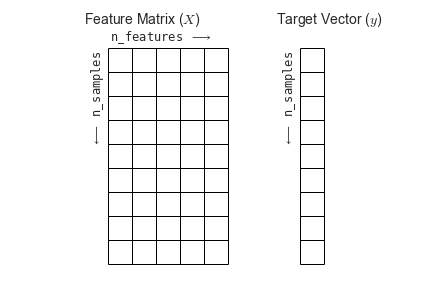

To separate our features from the outcome label, we can use the drop() method to remove the "Outcome" column from the dataframe, and reassign the result to X_df. For the outcome label, we can simply assign the "Outcome" column to a new dataframe.

In [ ]:
#Preparing the data for the ML models
X_df = diabetes_df.drop('Outcome',axis=1)
y_df = diabetes_df['Outcome']

Using the shape() and head() methods, we can varify that X_df and y_df are what we expect. The data for all 768 patients has been separated in the 8 feature columns and 1 label column.

In [ ]:
X_df.shape, y_df.shape

((768, 8), (768,))

In [ ]:
X_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [ ]:
y_df.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

To begin, let's build models on a subset of `X` (say 2 features). This will make visualization easier. We can subset the feature data frame by a list of columns, in this case, "Glucose and "Age".

In [ ]:
X_subset_df = X_df[['Glucose', 'Age']]

Here we build a simple function to visualize a 2D dataset and color the points by the outcome label. The function takes in 3 variables; the features (X_df), the labels (y), and the plot title (title) which is set to "Data in 2D" by default. The function returns the fi

In [ ]:
def visualize_2d(X_df,y, title="Data in 2D"):
  X = X_df.to_numpy()
  fig, ax = plt.subplots(figsize=(10,10))
  sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,ax=ax);
  ax.set_title(title)
  ax.set_xlabel("x1")
  ax.set_ylabel("x2")
  plt.close()
  fig.show()
  return fig, ax

By setting the feature and label dataframes to our subset of data, we can visualize the relationship between Glucose on the x-axis with age on the y-axis. 

In [ ]:
fig, ax = visualize_2d(X_subset_df, y_df);

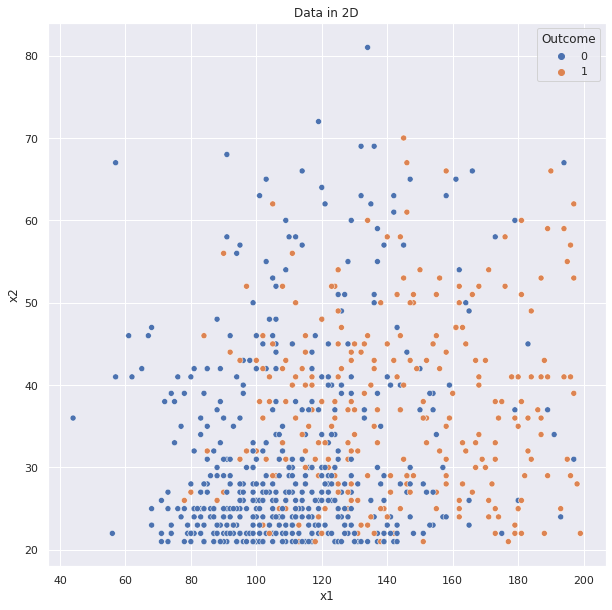

In [ ]:
fig

There seems to be a relationship between these 2 vairables and diabetes, where it seems more likely that increasing age and glucose levels are associated with diabetes. 

Let's fit a **Logistic Regression** model on this 2d data. Logistic Regression is a basic **classification model** that uses a logistic function to model a binary dependent variable. Sklearn's documentation for Logistic Regression can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

There is a number of ML classifiers in sklearn. They differ based on the particular algorithm each classifier employs to train the feature weights, but can be trained in a standard way. Firse we define a model object, then use the fit() methods with our feature and label dataframes.

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_subset_df, y_df)

LogisticRegression()

One of the outputs of the model is a decision function. A simple way of thinking of this function is as an equation that predicts the outcome from the input variables. In this case, we have 2 input variables, so the decision function can be visualized as a line. If a new patient's glucose and age inputs fall above this line, the prediction is that they have diabeties.

Here, we define a funtion to visualize the decision boundary of the 2-d model by plotting the decision boundary on the same plot as our datapoints.

In [ ]:
def plot_decision_boundary(model, ax=None):
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # create grid to evaluate model
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  # plot decision boundary 
  ax.contour(X, Y, P, colors='k',
            levels=[0], alpha=0.5,
            linestyles=['-'])
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

In [ ]:
plot_decision_boundary(lr_model,ax)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


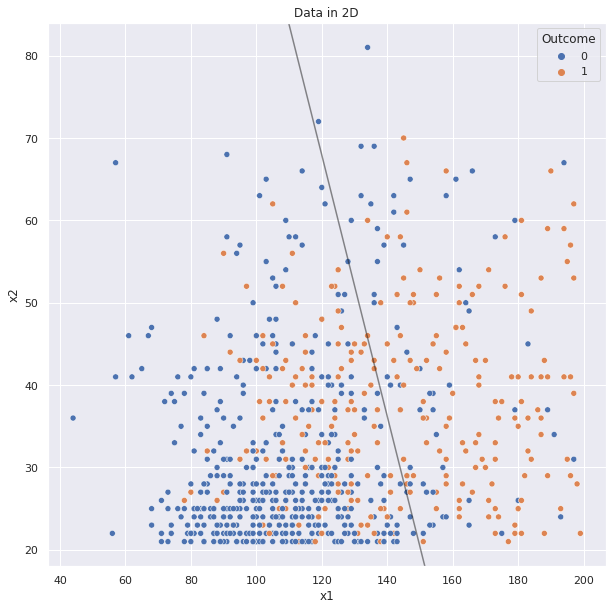

In [ ]:
fig

We can see that the model does an OK job separating out those with diabetes from those without. However there are a number of cases that fall on the "wrong" side of the line, which would result in a false positive or false negative prediction.

Question: what is this decision boundry in Logistic Regression?

Answer: The model decision function for 2 variable is: y = w1\*x1 + w2\*x2 + c, which defines a line. The coeficients w1 and w2, and intercetp can be extracted using methods provided with the mode.

In [ ]:
lr_model.coef_

array([[0.03836118, 0.02419256]])

In [ ]:
lr_model.intercept_

array([-6.24675179])

## Train and Test Sets: Splitting Data

A machine learning model aims to make good predictions on new, previously unseen data. But if you are building a model from your data set, how would you get the previously unseen data? Well, one way is to divide your data set into two subsets:

* **training set** — a subset to train a model.
* **test set** — a subset to test the model.

Good performance on the test set is a useful indicator of good performance on the new data in general, assuming that:

* The test set is large enough.
* You don't cheat by using the same test set over and over.




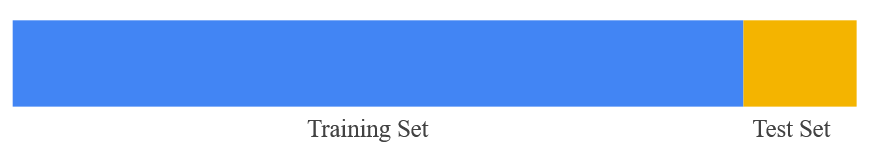

**Never train on test data**. If you are seeing surprisingly good results on your evaluation metrics, it might be a sign that you are accidentally training on the test set. For example, high accuracy might indicate that test data has leaked into the training set

sklearn provides the function `train_test_split` to split your data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [ ]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
602,1.0,124.0,74.0,36.0,125.0,27.8,0.100,30
429,1.0,95.0,82.0,25.0,180.0,35.0,0.233,43
623,0.0,94.0,70.0,27.0,115.0,43.5,0.347,21
209,7.0,184.0,84.0,33.0,125.0,35.5,0.355,41
589,0.0,73.0,72.0,29.0,125.0,21.1,0.342,25


In [ ]:
y_train.head()

602    0
429    1
623    0
209    1
589    0
Name: Outcome, dtype: int64

In [ ]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
158,2.0,88.0,74.0,19.0,53.0,29.0,0.229,22
251,2.0,129.0,84.0,29.0,125.0,28.0,0.284,27
631,0.0,102.0,78.0,40.0,90.0,34.5,0.238,24
757,0.0,123.0,72.0,29.0,125.0,36.3,0.258,52
689,1.0,144.0,82.0,46.0,180.0,46.1,0.335,46


In [ ]:
y_test.head()

158    0
251    0
631    0
757    1
689    1
Name: Outcome, dtype: int64

In [ ]:
Counter(y_train), Counter(y_test)

(Counter({0: 391, 1: 223}), Counter({0: 109, 1: 45}))

## Train and test classification models

In this step we train a model on the data and generate predictions. To make predictions we use the scikit-learn function "predict" and that takes as input, data in the same format as the training set.

Here, we will train the ML model on all 8 features and not just 2


Fit/train a model on the train set

In [ ]:
#Fit the model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Generate predictions on the test set

In [ ]:
#Generate Predictions
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Every ML classifiers outputs a set of numbers for each data point that represents the **probabilty** of classifying that point as positive (1) or negative (1)

In [ ]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

(array([44., 20., 20., 20., 13.,  7.,  8.,  8.,  4., 10.]),
 array([0.01426943, 0.11241175, 0.21055406, 0.30869637, 0.40683868,
        0.50498099, 0.60312331, 0.70126562, 0.79940793, 0.89755024,
        0.99569255]),
 <a list of 10 Patch objects>)

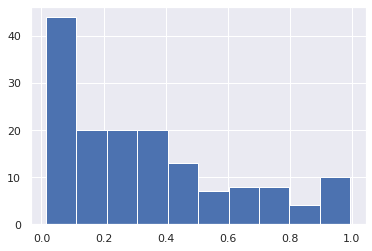

In [ ]:
#Let's plot the probabilities
plt.hist(y_pred_prob[:,1])

## Evaluation the classification model

After training the classification model on the training set and generating predictions on the test set, we would like to quality of the predictions i.e. the performance of the trained classification model on new test set. This is done using standard classification evaluation metrics such as **accuracy, precision and recall**. These require the list of predictions of your model and the actual labels/outcomes (ground truths)

### Confusion Matrix

We calculate the confusion matrix to evaluate performance of our model. We then review and caclulate the different metrics. 

A confusion matrix is a cross-tabulation that shows the correct class (or label) for each datapoint that was tested, along with the predicted class. You can use this 2-way table to determine if your model is making Type 1 (False Positve) or Type 2 (False Negative) errors.

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[95, 14],
       [22, 23]])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5c930bd4d0>)

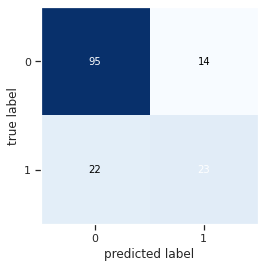

In [ ]:
plot_confusion_matrix(conf_mat=cm, show_absolute=True)

### Types of Errors

When making a prediction for a two-class classification problem, the following types of prediction vs actual can be made by a classifier:

* **False Positive (FP):** predict an event when there was no event.
* **False Negative (FN):** predict no event when in fact there was an event.
* **True Positive (TP):** predict an event when there was an event.
* **True Negative (TN):** predict no event when in fact there was no event.

Remember

* Type I Error  = False Positive  (Predicted 1, Actual 0)
* Type II Error = False Negative: (Predicted 0, Actual 1)

In [ ]:
#We use the confusion matrix function to extract the different types of errors
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(95, 14, 22, 23)

### Compute different evaluation metrics

In this section we will  use builtin scikit-learn scoring functions and the types of errors derived from the confusion matrix functions to evaluate our classification model.

In [ ]:
#Accuracy 
accuracy = (tp+tn)/(tp+tn+fp+fn)
print('Accuracy: %.3f' % accuracy)

#Recall/Sensitivity/True Positive rate
recall = sensitivity = tpr = tp / (tp + fn)
print('Recall: %.3f' % recall)

#Precision
precision = tp / (tp + fp)
print('Precision: %.3f' % precision)

#Specificity/Negative Recall/ True negative Rate/ 1-False Positive Rate
specificity = tn / (tn + fp)
print('Specificity: %.3f' % specificity)

#F1 Score
f1 = 2*(precision*recall)/(precision+recall)
print('F1: %.3f' % f1)

Accuracy: 0.766
Recall: 0.511
Precision: 0.622
Specificity: 0.872
F1: 0.561


In [ ]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy)

#Recall
recall = recall_score(y_test, y_pred)
print('Recall: %.3f' % recall)

#Precision
precision = precision_score(y_test, y_pred)
print('Precision: %.3f' % precision)

#The f1-score is the harmonic mean of precision and recall
f1 = f1_score(y_test, y_pred)
print('F1: %.3f' % f1)

Accuracy: 0.766
Recall: 0.511
Precision: 0.622
F1: 0.561


Helper function that take actual labels and predictions as input and prints the classification metrics. Same as before just encapsulated in a function so that we can call it with different inputs

In [ ]:
#Function that calculates and print metrics
def show_metrics(y_test, y_pred):
  print('====================')
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: %.3f' % accuracy)
  recall = recall_score(y_test, y_pred)
  print('Recall: %.3f' % recall)
  precision = precision_score(y_test, y_pred)
  print('Precision: %.3f' % precision)
  f1 = f1_score(y_test, y_pred)
  print('F1: %.3f' % f1)
  print('====================')

In [ ]:
show_metrics(y_test, y_pred)

Accuracy: 0.766
Recall: 0.511
Precision: 0.622
F1: 0.561


**Metrics with different threshold**

In [ ]:
#Function that returns predictions at a specific threshold
def get_predictions(y_pred_prob, threshold=0.5):
  predictions = np.where(y_pred_prob <= threshold, 0, 1)
  return predictions[:,1]

**Increase the threshold**

The number of false positives decreases, but false negatives increase. As a result, precision increases, while recall decreases:

In [ ]:
y_pred1 = get_predictions(y_pred_prob, 0.7)
show_metrics(y_test, y_pred1)

Accuracy: 0.786
Recall: 0.378
Precision: 0.773
F1: 0.507


**Decrease the threshold**
False positives increase, and false negatives decrease. As a result, this time, precision decreases and recall increases:


In [ ]:
y_pred2 = get_predictions(y_pred_prob, 0.3)
show_metrics(y_test, y_pred2)

Accuracy: 0.675
Recall: 0.756
Precision: 0.466
F1: 0.576


#### Threshold independent Metric: **AUC-ROC**

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate
* False Positive Rate


An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

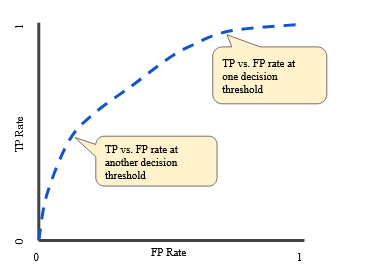

In [ ]:
#AUROC = Area Under the Receiver Operating Characteristic curve
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print('AUCROC: %.3f' % roc_auc)

AUCROC: 0.805


More details: Review after class

Generate FPR and TPR at different thresholds using the `roc_curve` function

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [ ]:
y_test.shape, thresholds.shape

((154,), (44,))

DataFrame showing three columns: FPR, TPR and Threshold. This represents different values of FPR and TPR at different thresholds

In [ ]:
pd.DataFrame([fpr,tpr,thresholds]).T

In [ ]:
#Function to plot ROC curve  
def plot_roc(y_test, predictions, title):
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)  
    print('AUROC: %.3f' % roc_auc)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

Let's plot the ROC curves for a perfect classifier, classifier based on random guessing and our trained model : Logistic regression. The area under the ROC curve is the AUC-ROC metric. A perfect classifier has AUCROC = 1 and random guessing will have a AUCROC around 0.5. 
Our trained Logistic Regression classifier has a AUCROC of 0.8

AUROC: 1.000


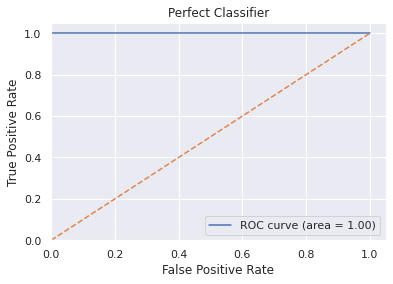

AUROC: 0.477


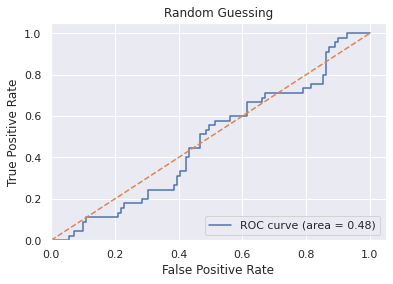

AUROC: 0.805


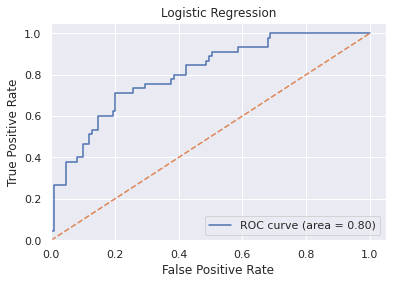

In [ ]:
plot_roc(y_test, y_test,"Perfect Classifier")
plot_roc(y_test, np.random.uniform(0, 1, len(y_test)) ,"Random Guessing")
plot_roc(y_test ,y_pred_prob[:,1], "Logistic Regression")

### Classification Report

You can also generate the precision, recall, and f1 scores using classification_report. 

* Scores of every class correspond to the accuracy of the classifier in classifying that particular class compared to the other class.

* The support is the number of samples of the true response that are in that class.

* The last line gives a weighted average of precision, recall and f1-score where the weights are the support values. 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       109
           1       0.62      0.51      0.56        45

    accuracy                           0.77       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.76      0.77      0.76       154



### Trying Other classifiers

Let's try some other classifiers. We will run 
* Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Support Vector Machine : https://scikit-learn.org/stable/modules/svm.html, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC


in addition to Logistic Regression and compare models based on the different metrics we discussed.

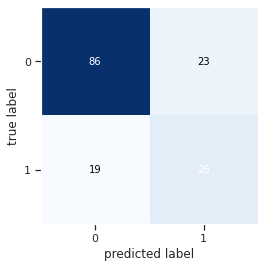

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       109
           1       0.53      0.58      0.55        45

    accuracy                           0.73       154
   macro avg       0.67      0.68      0.68       154
weighted avg       0.73      0.73      0.73       154

Accuracy: 0.727
Recall: 0.578
Precision: 0.531
F1: 0.553
AUCROC: 0.825


In [ ]:
#Fit the model
#model = LogisticRegression(solver='lbfgs')
model = RandomForestClassifier(n_estimators=100)
#model = svm.SVC(probability=True)
model.fit(X_train, y_train)

#Prediction
predictions_proba = model.predict_proba(X_test)
predictions = model.predict(X_test)


#Getting the confusion matrix for the new 
cm = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm, show_absolute=True)
plt.show()

#Let's print the classification
print(classification_report(y_test, predictions))

#Getting the metrics
show_metrics(y_test, predictions)

#Compute and print AUC-ROC Curve
roc_auc = roc_auc_score(y_test, predictions_proba[:,1])
print('AUCROC: %.3f' % roc_auc)

## Feature Importance using Tree-Based Classifiers

We will a tree based ensemble classifier: **XGBoost**, which is very a popular ML model to output feature importance. A benefit of using ensembles of decision tree methods like gradient boosting is that they can automatically provide estimates of feature importance from a trained predictive model. Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

XGGBoost Documentation: https://xgboost.readthedocs.io/en/latest/
Check this article for more information on feature importance usinfg XGBoost: https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/



In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

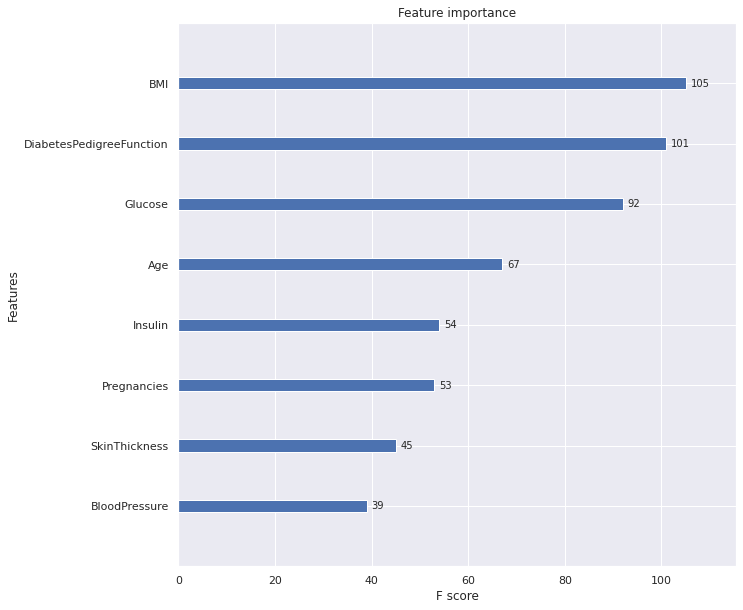

In [ ]:
# plot feature importance
fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(model, ax=ax)
plt.show()